In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import pyabeles as pa
%matplotlib inline

In [2]:
data = np.genfromtxt('Miro data.csv',delimiter=',',skip_header=64)
x = data[:,0]
y = data[:,1]
scale = y[0]
for i in range(0,len(y)):
    y[i] /= scale
    x[i] /= 2

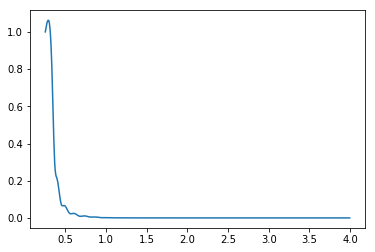

In [3]:
plt.plot(x,y)

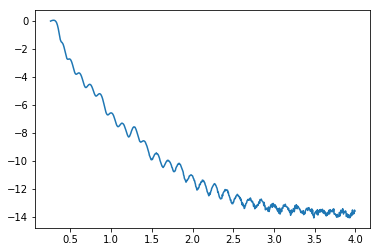

In [4]:
plt.plot(x,np.log(y))

In [5]:
struct = pa.Surface()
STO = pa.Layer(0.,5.246,sigma=0.26,name="STO")
LSMO = pa.Layer(300.,6.6, sigma=5.85, name="LSMO")
for i in range(0,1):
    struct.addLayer(LSMO)
struct.addLayer(STO)
exp = struct.doExperiment(x)
R = exp.genTheory(modify=False)
exp.theory = y
f = pa.Fitter(exp,method="nm",cutoff_begin=0,cutoff_end=700)

In [8]:
surf = f.fit_all()
mhm = surf[0].doExperiment(x).genTheory()
plt.plot(x[0:],np.log10(mhm[0:]))
plt.plot(x[0:],np.log10(y[0:]))
f.error(exp.get_params_list())

AttributeError: Fitter instance has no attribute 'fit_all'

In [7]:
exp.get_params_list()

[1.2410589660254932e-06,
 -0.038364315643016914,
 3.1713654548156516,
 306.76739322728952,
 -0.014883437803656935,
 11.434474774907315,
 10.52466817594841,
 5.0478534614862554,
 2.7949026885294693e-05]